**Importing Libraries**

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Loading the datasets**

In [2]:
(train_x, train_y),(test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Basic Pre-processing**

In [3]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
train_x = train_x/255.0
test_x = test_x/255.0

**CNN model using Keras**

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss= 'categorical_crossentropy' , optimizer= keras.optimizers.Adadelta(), metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


**Training the model**

In [5]:
train = model.fit(train_x, keras.utils.to_categorical(train_y), batch_size=128, epochs=5, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 152us/step - loss: 0.1574 - acc: 0.9537 - val_loss: 0.0909 - val_acc: 0.9718
Epoch 2/5
48000/48000 [==============================] - 4s 91us/step - loss: 0.0515 - acc: 0.9850 - val_loss: 0.0585 - val_acc: 0.9837
Epoch 3/5
48000/48000 [==============================] - 4s 92us/step - loss: 0.0288 - acc: 0.9917 - val_loss: 0.0470 - val_acc: 0.9856
Epoch 4/5
48000/48000 [==============================] - 4s 92us/step - loss: 0.0157 - acc: 0.9957 - val_loss: 0.0438 - val_acc: 0.9865
Epoch 5/5
48000/48000 [==============================] - 4s 91us/step - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0430 - val_acc: 0.9875


**Graphical Representation of Loss Curve**

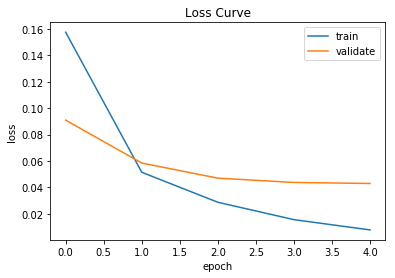

In [8]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Loss Curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validate'], loc = 'upper right')
plt.show()

**Evaluation on Test Data**

In [13]:
print('Accuracy on test data = ', model.evaluate(test_x, keras.utils.to_categorical(test_y))[1])

10000/10000 [==============================] - 1s 78us/step
Accuracy on test data =  0.9874
